## Lets Understand some of the most Interesting Patterns of Funding and Startups.

* **How Does the Funding Ecosystem changes with respect to Time?**
* **What is the General Amount that Startups get in India?**
* **Which Kind of Industries are more preferred for Startups?**
* **Does Location also play a role, In determining the Growth of a Startup?**
* **Who plays the main role in Indian Startups Ecosystem?**
* **What are the different Types of Funding for Startups?**

In [1]:
# for mathematical operations
import numpy as np 

# for dataframe operations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# lets select  a background style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 7)

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [2]:
data=pd.read_csv("startup_funding.csv")

data.columns=["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical",
                        "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]

def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

# lets apply the function to clean the data
for col in ["StartupName", "IndustryVertical", "SubVertical", "City", 
            "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
    data[col] = data[col].apply(lambda x: clean_string(x))
    
# lets check the head of the data
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [3]:
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [4]:
print(f"size of data:{data.shape}")

size of data:(3044, 10)


## Data Cleaning

In [5]:
import warnings
warnings.filterwarnings('ignore')

total=data.isnull().sum().sort_values(ascending=False)
percent=((data.isnull().sum()/data.isnull().count())*100).sort_index(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['total','percent %'])
missing_data

,total,percent %
SNo,0,0.0
Date,0,0.0
StartupName,0,0.0
IndustryVertical,0,0.0
SubVertical,0,0.0
City,0,0.0
InvestorsName,0,0.0
InvestmentType,0,0.0
AmountInUSD,0,0.0
Remarks,0,0.0


In [6]:
data['AmountInUSD'].value_counts()

nan            960
10,00,000      165
5,00,000       108
20,00,000       69
30,00,000       66
              ... 
3,76,000         1
1,82,00,000      1
91,00,000        1
27,50,000        1
1,48,434         1
Name: AmountInUSD, Length: 472, dtype: int64

In [7]:
data=data.drop(['Remarks'],axis=1)
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

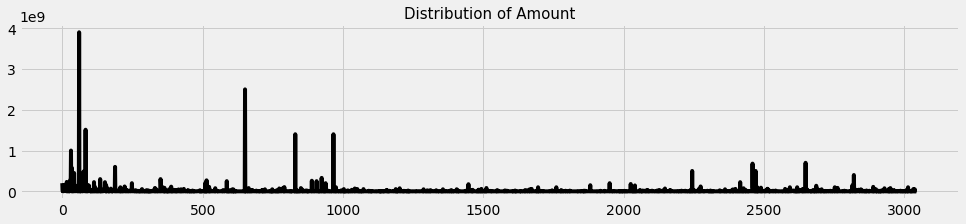

In [8]:
# lets convert the amount column into numerical, so that we can analyze the values inside it

# function to clean the AmounInUsd Column
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

# lets apply the function on the column
data["AmountInUSD"] = data["AmountInUSD"].apply(lambda x: float(clean_amount(x)))
data["AmountInUSD"]
# lets check the head of the column after cleaning it
plt.rcParams['figure.figsize'] = (15, 3)
data['AmountInUSD'].plot(kind = 'line', color = 'black')
plt.title('Distribution of Amount', fontsize = 15)
plt.show()

In [9]:
## Cleaning the dates

data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

## How Does the Funding Ecosystem changes with respect to Time?

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


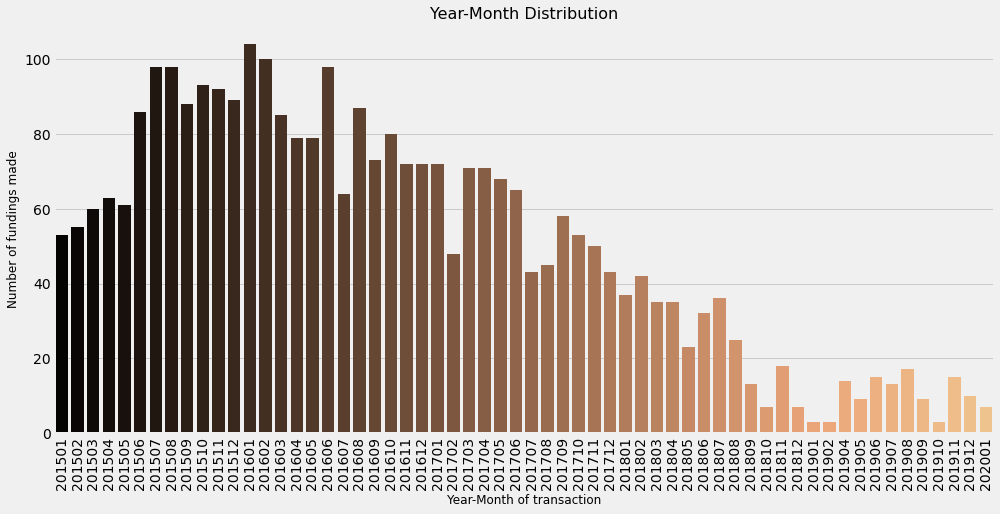

In [10]:
# some of the date formats are written wrongly so we have to clean them thoroughly so that we can analyze these values

# converting them into a Datetime object
data["yearmonth"] = (pd.to_datetime(data['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)


temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = data['yearmonth'].value_counts()
# lets plot the data 
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

## What is the General Amount that Startups get in India?

In [11]:
# lets check the Maximum funding of a startup
print("Maximum funding to a startup is:",data["AmountInUSD"].max())

Maximum funding to a startup is: 3900000000.0


In [12]:
# lets check the startups with more than 50crore+ funding

@interact
def check(column = 'AmountInUSD', x = 500000000): # 50 crore funding of startups
    return data[data[column] > x].sort_values(by = 'AmountInUSD', ascending = False)

interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=500000000, description=…

In [13]:
# lets check out different ventures of Paytm
data[data.StartupName=='Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.990000e+02,201503
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,201502


In [14]:
# lets check out different ventures of flipkart
data[data.StartupName=='Flipkart']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,201708
773,774,26/06/2017,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07,201706
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703
1032,1033,20/02/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07,201702
2689,2690,04/06/2015,Flipkart,eCommerce platform,nan,Bangalore,Morgan Stanley,Private Equity,5.000000e+07,201506


In [15]:
# lets check the minimum funding in a startup
b=data["AmountInUSD"].dropna().sort_values().min()
print(f"Minimum funcding to a startup:{b}")

Minimum funcding to a startup:-999.0


In [16]:
# lets check the startups with least funding
data[['AmountInUSD','StartupName']].sort_values(by='AmountInUSD',ascending=True).head(5)
no_funded=data[data['AmountInUSD']==-999].count()
print(no_funded)

SNo                 971
Date                971
StartupName         971
IndustryVertical    971
SubVertical         971
City                971
InvestorsName       971
InvestmentType      971
AmountInUSD         971
yearmonth           971
dtype: int64


In [17]:
# average funding
data[['AmountInUSD','StartupName']].dropna().mean()


AmountInUSD    1.327006e+07
dtype: float64

Total number of funding each startup got: 2457
Swiggy       8
Ola Cabs     8
Paytm        7
Nykaa        6
NoBroker     6
Medinfi      6
UrbanClap    6
Meesho       6
Jugnoo       5
Flipkart     5
Name: StartupName, dtype: int64


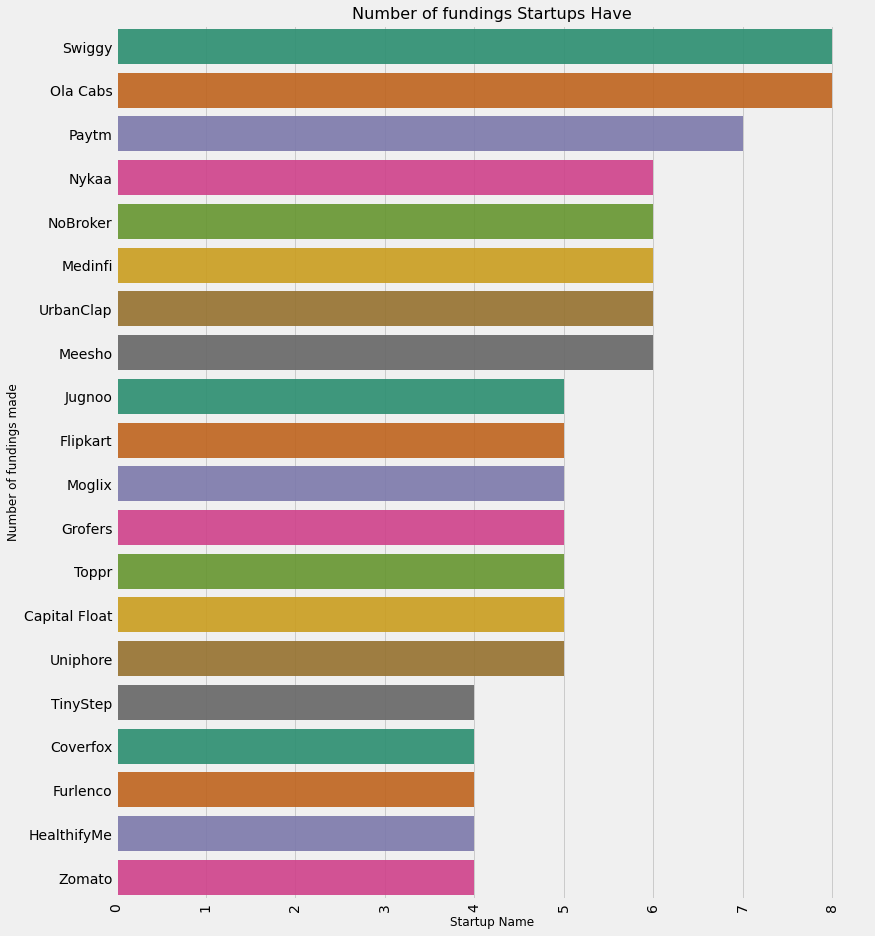

In [18]:
# lets check the no. of funding each startsup got
print("Total number of funding each startup got:",len(data['StartupName'].unique()))
print(data['StartupName'].value_counts().head(10))
startupname = data['StartupName'].value_counts().head(20)
# lets plot the data
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

## Which Kind of Industries are more preferred for Startups?

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: IndustryVertical, dtype: int64


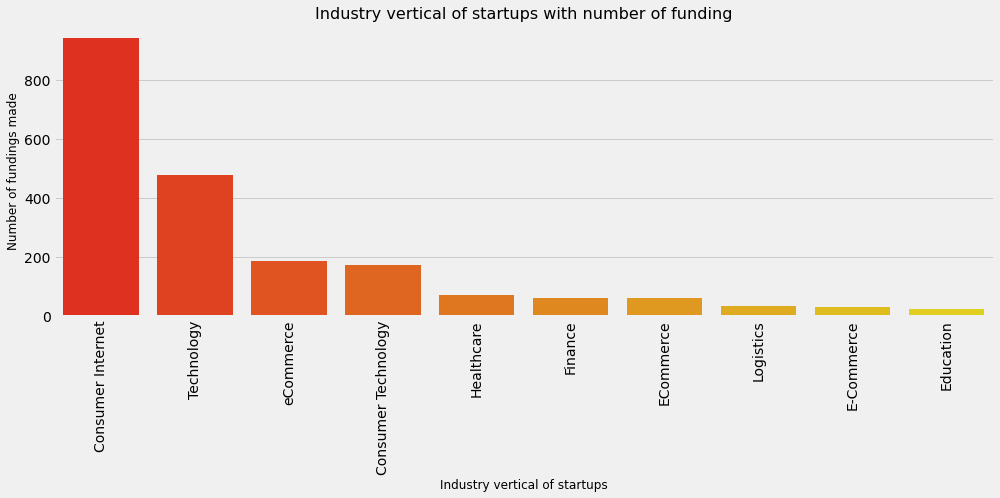

In [19]:
data["IndustryVertical"]=data["IndustryVertical"].replace("nan",'Consumer Technology')
industry=data["IndustryVertical"].value_counts().head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

Online Lending Platform          11
Online Pharmacy                  10
Food Delivery Platform            8
Education                         5
Online Education Platform         5
Online lending platform           5
Online Lending                    5
Online Learning Platform          5
Non-Banking Financial Company     4
Online Food Delivery              4
SaaS                              3
ECommerce Marketplace             3
Online learning platform          3
E-learning                        3
Data Analytics platform           3
Logistics                         3
Fitness Mobile App                3
Online Payment Gateway            3
Online Insurance Platform         3
Online Marketplace                3
Name: SubVertical, dtype: int64


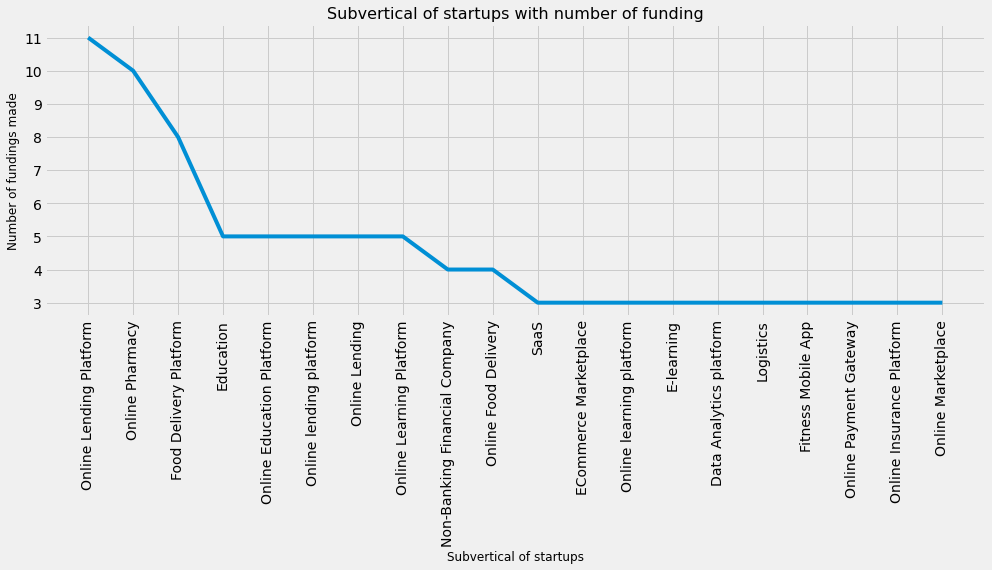

In [20]:
sub_industry=data["SubVertical"].value_counts().drop('nan').head(20)
print(sub_industry)
# lets plot the data
sns.lineplot(sub_industry.index, sub_industry.values, palette = 'winter')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

## Does Location also play a role, In determining the Growth of a Startup?

Bangalore    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Name: City, dtype: int64


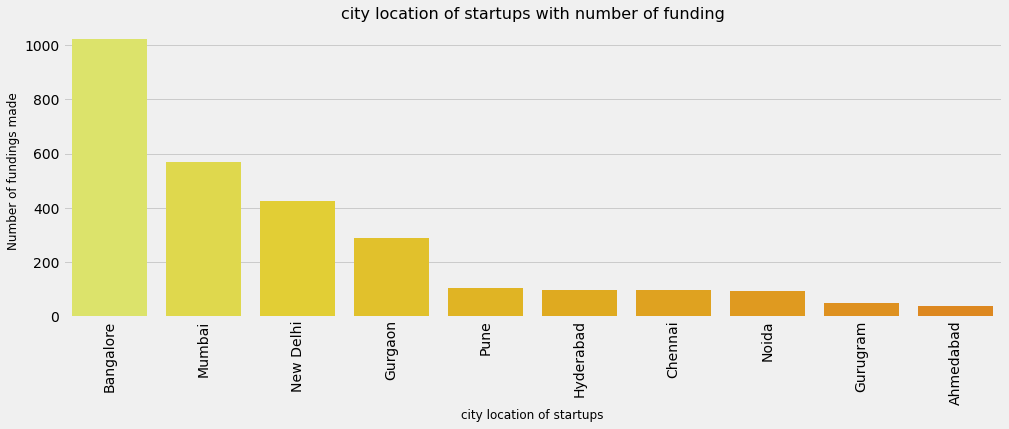

In [21]:
# analyzing the effect of Cities on a Startup

# lets clean the data for better analysis
data['City'] = data['City'].replace(('Bengaluru', 'nan'),('Bangalore', 'Bangalore'))

city = data['City'].value_counts().head(10)
print(city)
# lets plot the data
sns.barplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
SAIF Partners                10
Name: InvestorsName, dtype: int64


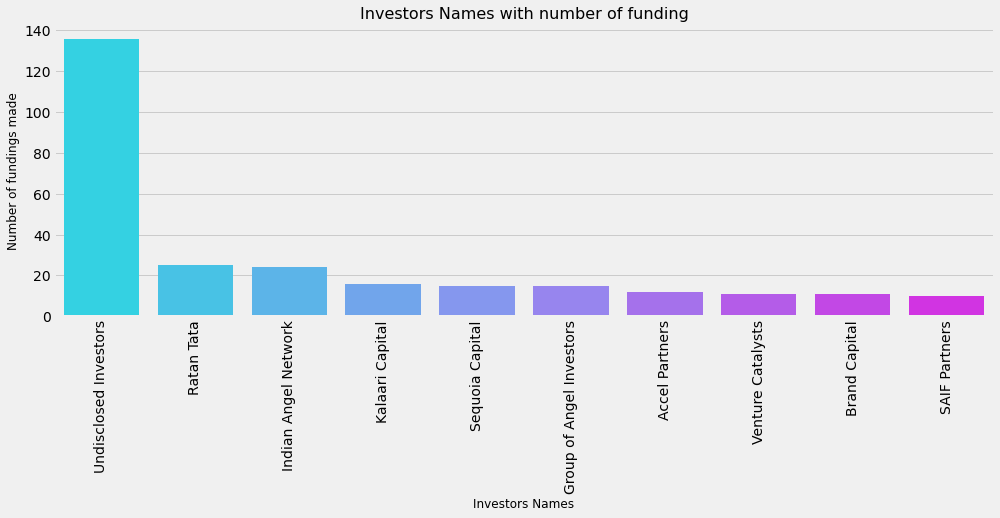

In [22]:
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'nan'] = 'Undisclosed Investors'


investors=data['InvestorsName'].value_counts().head(10)
print(investors)
# lets plot the data
sns.barplot(investors.index, investors.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

## What are the different Types of Funding for Startups?

Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentType, dtype: int64


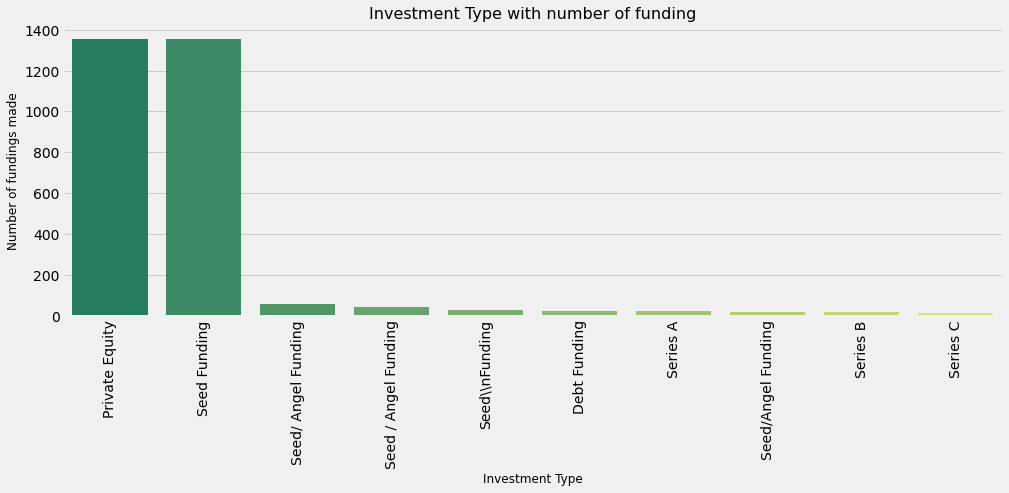

In [23]:
investment_types=data['InvestmentType'].value_counts().head(10)
print(investment_types)
# lets clean the dataset
data['InvestmentType'][data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
data['InvestmentType'][data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
data['InvestmentType'][data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'
# lets plot the data
sns.barplot(investment_types.index, investment_types.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()
